# Bağlantı Kurma

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [5]:
!ls "/gdrive/MyDrive/Calisma_ortami/veriler.csv"

/gdrive/MyDrive/Calisma_ortami/veriler.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [7]:
dataFrame = pd.read_csv("/gdrive/MyDrive/Calisma_ortami/veriler.csv")
dataFrame

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


# Veriyi Anlamlandırma

## Kategorik Bir Değişken Numarik Bir Değişkene Çevirme

Veriyi daha çok anlamlandırabilmek adına "cinsiyet" bilgisini `from sklearn.preprocessing import LabelEncoder` ile 0-1 dönüşümü yapıldı.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lencoding= LabelEncoder()

In [10]:
cinsiyet=dataFrame.iloc[:, 4:].values

In [11]:
cinsiyet[:,-1]= lencoding.fit_transform(dataFrame.iloc[:,-1])
dataFrame.drop("cinsiyet", axis=1).values
dataFrame["cinsiyet"]= cinsiyet
dataFrame

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,0
1,tr,125,36,11,0
2,tr,135,34,10,1
3,tr,133,30,9,1
4,tr,129,38,12,0
5,tr,180,90,30,0
6,tr,190,80,25,0
7,tr,175,90,35,0
8,tr,177,60,22,1
9,us,185,105,33,0


In [12]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [13]:
dataFrame.describe()

,boy,kilo,yas
count,22.000000,22.000000,22.000000
mean,163.363636,62.136364,28.681818
std,21.077059,22.286651,12.988590
min,125.000000,30.000000,9.000000
25%,156.000000,42.500000,22.250000
50%,165.500000,59.500000,28.500000
75%,179.250000,80.000000,38.000000
max,193.000000,105.000000,55.000000


In [14]:
dataFrame.corr()

<ipython-input-14-6bf2272b98ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,boy,kilo,yas
boy,1.000000,0.899177,0.508706
kilo,0.899177,1.000000,0.423259
yas,0.508706,0.423259,1.000000


<Axes: >

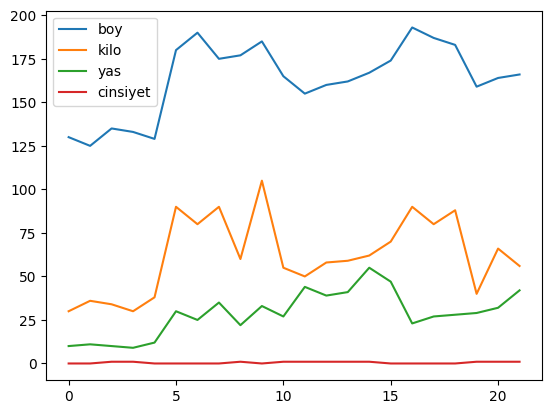

In [15]:
dataFrame.plot()

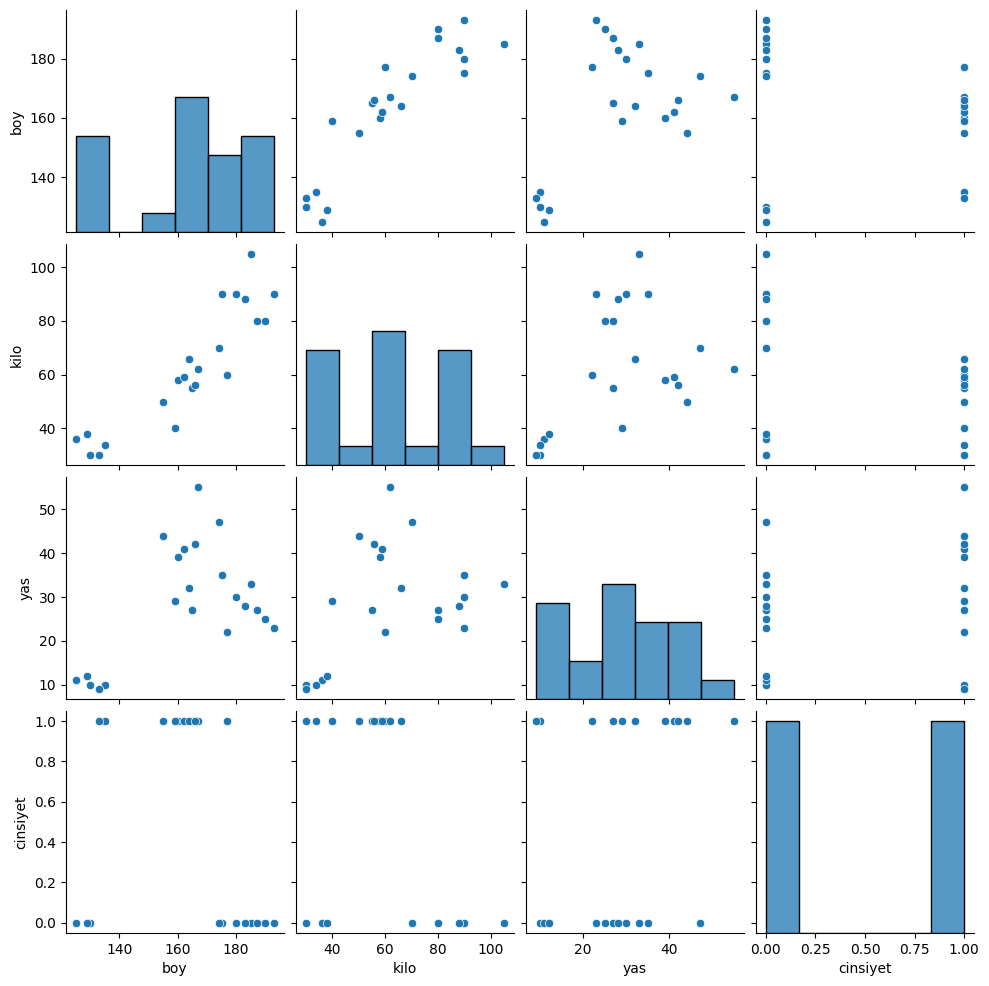

In [16]:
sbn.pairplot(dataFrame)

# Veriyi Bölme

## Veriyi Dikey Eksende Bölme

Yani veride bağımlı ve bağımsız değişkenlere karar verme olarak düşünebiliriz.
Burda dikeyden kasıt öyle bir bölelimki bağımlı değişken (y) ve bağımsız değişken/ değişlenler (x) oluşturalım.

In [17]:
x= dataFrame.iloc[:,1:4].values
y= dataFrame.iloc[:, 4:].values

## Veriyi Yatay Eksende Bölme

Yani artık verinin bağımlı değişkeni ve bağımsız değişkenleri belli. Geriye modelde kullancağımız train ve test kısmı kaldı. Veriyi yatayda train ve test kısımlarına hangi oranda pay edeceksek ona göre böleriz.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=False, random_state=0)

In [20]:
y_train

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=object)

In [21]:
x_test

array([[167,  62,  55],
       [174,  70,  47],
       [193,  90,  23],
       [187,  80,  27],
       [183,  88,  28],
       [159,  40,  29],
       [164,  66,  32],
       [166,  56,  42]])

# Veriyi Önişleme & Ölçeklendirme

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train= scaler.fit_transform(x_train)

In [25]:
x_test= scaler.fit_transform(x_test)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg= LogisticRegression(random_state=0)

In [28]:
log_reg.fit(x_train, y_train.astype(int))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [29]:
y_predict= log_reg.predict(x_test)

In [30]:
print(y_predict)

[1 1 0 0 0 1 0 1]


In [31]:
print(y_test)

[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


# Confusion Matrix

2 x 2 lik bir matris düşünelim.

*        c1     c2

*   c1   1,T    2,F
*   c2   3,F    5,T  

 Burdaki matris örneğinde c1-c1 ve c2-c2 diagonalleri daima doğru olan değerleri bize verirken diğer taraftan yanlış verilerin olduğunu bize gösterir. Doğru değerleri kendi aralarında toplar ve toplam veriye bölersek burada doğruluk payını bulmuş oluruz. accuracy ise yanlışlardır ve acc = 1- doğrular diyebiliriz.

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm= confusion_matrix(y_test.astype(int),y_predict.astype(int))

In [34]:
print(cm)

[[3 1]
 [1 3]]


# K-NN Algoritması

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_reg= KNeighborsClassifier(n_neighbors=7, metric="minkowski")

In [37]:
knn_reg.fit(x_train, y_train.astype(int))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [38]:
y_predict= knn_reg.predict(x_test)

In [39]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 1])

In [40]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [41]:
cm= confusion_matrix(y_test.astype(int), y_predict)

In [42]:
cm

array([[3, 1],
       [0, 4]])

# SVC Algoritması (Support Vector Machine)

Belirli alt algoritmalar kullanılarak örneğin `kernel= "rbf", "linear", "poly", "sigmoid"` vb. Bunlara ait dereceler ile yani örnekleri kaç alt gruba bölüneceği belirlenerek : `degree` tahmini yapmaya çalışır. Burda yapılan kaç alt örneğe bölünüyorsa örneğin 3 ve kernel fonksiyonuda linear olsun diyelim. Önce örnekleri 3 ' e böler birbirine yakınlık ilişkisine göre ve fonksiyonu lineer seçmiştik. Bölen 3 doğru lineer fonksiyon olur. Tahmin etmek istediğimiz değere yani marjine paralel iki adet destek vektör ile sınıflamaya çalişır.

### Kernel Trick ( Çekirdek Hilesi )

Bazen iki bayoutta gözlemleyemeyeceğimiz değişimleri kernel trick ile üçüncü boyutta çıkararak gaussion hesabı ile tepecikler oluştururuz.

In [43]:
from sklearn.svm import SVC

In [44]:
svc= SVC(C=2 ,kernel="poly", degree=3, gamma=1)

In [45]:
svc.fit(x_train.astype(int), y_train.astype(int))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, gamma=1, kernel='poly')

In [46]:
y_predict= svc.predict(x_test)

In [47]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 1])

In [48]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [49]:
cm= confusion_matrix(y_test.astype(int), y_predict)

In [50]:
cm

array([[3, 1],
       [0, 4]])

# Naive Bayes Algoritması

3 temel olmak üzere 4 tane uygulama şekli vadrı. Bunlaardan en yaygını Gaussian Naive Bayes algotirmasıdır. Multinominal Naive Bayes, Bernoulli Naive Bayes ve out of core Naive Bayes.

Tahminleyeceğimiz değer reel sayılardan oluşuyorsa Gaussion,
Nominal değerlerden oluşuyorsa Multinominal,
Bernoulli ise  binary durumlarda ikili oaln yani evet/hayır, kadın/ erkek gibi durumlarda kullanılır.

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb= GaussianNB()

In [53]:
gnb.fit(x_train.astype(int), y_train.astype(int))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [54]:
y_predict= gnb.predict(x_test)

In [55]:
y_predict

array([1, 1, 0, 0, 0, 0, 1, 1])

In [56]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [57]:
cm= confusion_matrix(y_test.astype(int), y_predict)

In [58]:
cm

array([[3, 1],
       [1, 3]])

# Decision Tree Classifier

Karar ağaçları regresyonda kullannıldığı gibi sınıflandırmada da kullanılabilir.

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtc = DecisionTreeClassifier(criterion="entropy")

In [61]:
dtc.fit(x_train, y_train.astype(int))

DecisionTreeClassifier(criterion='entropy')

In [62]:
y_predict= dtc.predict(x_test)

In [63]:
y_predict

array([1, 1, 0, 0, 0, 0, 1, 1])

In [64]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [65]:
cm= confusion_matrix(y_test.astype(int), y_predict)

In [66]:
cm

array([[3, 1],
       [1, 3]])

# Random Forest Classifier

Tabiki regresyon algoritması olduğu gibi sınıflandırma yapabilen bir algortima.

Burda dikkat etmemiz gereken `n_estimators` özelliği ki bu da: foresttaki ağaçların sayısını belirlemede kullaılır.
Ayrıca `criterion` ile de `entropy`, `gini` ya da `log_loss` seçenekleriyle tehmin başarısını arttırabilir. Defaultta `gini` gelmektedir.




In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [69]:
rfc.fit(x_train, y_train.astype(int))

<ipython-input-69-4b3d5084c4af>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train.astype(int))


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [70]:
y_predict= rfc.predict(x_test)

In [71]:
cm= confusion_matrix(y_test.astype(int), y_predict)

In [72]:
cm

array([[3, 1],
       [0, 4]])

# Accuracy ve Accuracy Paradox - ZeroR Algorythm

Accuracy başarı oranına baktığımızda burada çıkabicek bi handikap var.

** `accuracy paradox`** bu konuya dikkat etmek gerekir. 2 x 2 lik bir confusion matris oluşturalım. C1 ve C2 değerleri olsun. Tabiki tahmin değerleri de olacak. Matris oluşturuyoruz. Gerçekte doğru ve yanlış olan değerler olsun, bir de tahmin ettiğimiz doğru ve yanlış değerler olsun.



*   Gerçekte Doğru = TP
*   Gerçekte Yanlış = FP
*   Tahmini Doğru = TN
*   Tahmini Yanlış = FN olarak isimlendirelim.

ZeroR Algorythm= Veriler üzerinde hangisi daha baskınsa diğerlerine bakmaksızın oranlama yapar ve temel işi bir algoritmadır. Herhangi bir öğrenme yapmaz. Yani yukarda verdiğimiz örnekte C1 ve C2 tahminlerinden hangisi daha fazla ise onu alır. Örneğin C1 sayısı daha fazla, o zaman her durumda sonucu C1 çıkarır. Hiç bir zaman C2 çıkma olasılığı yoktur. ZeroR algoritmasınında altında çıkacak bir accuracy değeri şu demek olur: yani en kötü algortimadan bile daha kötü bir algoritma geliştirmişiz demek olur. Burda sonuç olarak yanlız ya da tamamen accuracy' e güvenemeyiz. Farklı güven methotları var. (`ROC ve AUC Değerleri`) Buna da accuracy paradox denir.


In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy= accuracy_score(y_test.astype(int), y_predict)

In [75]:
accuracy

0.875

# ROC- Receiver Operating Characteristic



In [76]:
y_proba= rfc.predict_proba(x_test)
y_proba[:,0]

array([0.1, 0.1, 0.9, 0.8, 0.9, 0.4, 0.1, 0.3])

In [77]:
from sklearn import metrics

In [79]:
#fpr, tpr, thold = metrics.roc_curve(y_test.astype(int), y_proba[:,0], pos_label="e")